# Intro to CART and Decision Trees
Author:  David Yerrington(SF)

![](https://snag.gy/ODlA5Z.jpg)

![](./images/tree-2.gif)

### Lesson Objectives

- Understand the core concepts behind decision tree classifiers
- How class balance relates to **Gini** and **Entropy**
- The concept of **Information Gain**
- How decision trees use information gain to make decisions

### Library Dependencies

Pydotplus can be a difficult library to install.  If it can be easily installed with pip, it may be useful to you in the future.  Otherwise, for the purpose of today's lectures, if it's not easily installed it's optional.

In [2]:
!pip install pydotplus pydot2

    100% |████████████████████████████████| 286kB 1.8MB/s eta 0:00:01
  Running setup.py bdist_wheel for pydotplus ... done
  Stored in directory: /Users/davidyerrington/Library/Caches/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
  Running setup.py bdist_wheel for pydot2 ... done
  Stored in directory: /Users/davidyerrington/Library/Caches/pip/wheels/e2/ee/4c/b7dcb1646cf99c8d70b67996166503fff4de9566635669f846
Successfully built pydotplus pydot2
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pydotplus



> _If you're using Docker:_
Let's not worry if this doesn't work easily but here's a mini guide that should help temporarily install Graphviz which is used to visualize decision trees -- this isn't necessary to get this to work but it's nice if it does.

> With your notebook running, make note of the container ID running with:
```
docker ps
```
>  Make note of your container running and replace it below
```
docker exec --user root -it dsi /bin/bash
apt update
apt-get install graphviz --yes
```
>_Then in a blank cell_
>
```
!pip install pydotplus
```




## (~10 mins) Let's make a decision tree

Lets work with a partner and come up with some everyday situation where you might be able to model it with a decision tree.

For the given amount of time, work with your partner.  We will attempt to use draw.io in order to present our activity at the end of our session (we'll give you a little tutorial before).

https://www.draw.io/



## What's so great about decision trees?

Decision trees are part of the **C**lassification **A**nd **R**egression **T**rees family of algorithms and are the choice of many **ensemble methods** as a base estimator.  It is essential to fully understand the inner process of decision trees to use them effectively but to understand **ensemble methods** that might use them as well.

>_An ensemble method is a meta-model that combines the power of many weaker estimators to create a more powerful estimator.  ie:  Many decisions trees can be used to create a random forest._

- Random forests
- Adaptive Boosting
- XGBoost
- etc.

### 1. We don't have to scale our data.
Much in the same way that decision trees don't need much preprocessing in order to work, the base assumptions around how data is used and estimated, don't rely on scale to be effective.

### 2. Decision trees don't care about how your data is distributed.

Is your data heavily skewed or not normally distributed?  Decision trees are a great choice for classification or regression problems

### 3. Decision trees don't require much preprocessing to use.

No need for dummy encoding categorical variables, or log scaling anything for normality assumptions.  Blank values can also be handled.  You still want to follow best practices for handling data and missing values.

### 4. Easy to interpret.

The output of a decision tree is easy to interpet and thus relatable to non-technical people.

> **Protip**
>
> Consider creating a benchmark using a decision tree to understand how one might behave on its own before using one in an ensemble method.  Do your best to understand how a simple model behaves on a set of data, before using a more complex model.  This is a great practice to get into.

# Decision Trees:  Overview


The goal of a decision tree is to differentiate sections of a dataset (a partition) that easily unmix the classes contained within them, through a series of conditional splits.  A partition is considered to be pure once all data of a specific class exists in it.  How data is partioned (ie: split), depends on the conditions that qualifies how it is partitioned.  Each time data is partitioned conditionally, it can be partitioned again until all data of a specific class is contained in the terminating partition (leaf node).

> <img src="https://snag.gy/GU8edJ.jpg">
> We use **gini** or **entropy** to measure this idea of "purity" within a partion (bacon vs vegetable in this example).  Another way to think about **purity** is how "unbalanced" the proportion of classes are.  The more _unbalanced_ a set classes are within a given partition, the more **pure** the partition is.

## 1. All data enters the root node.
In the beginning, all of our data enters the root node of our decision tree, before a splitting condition is selected.

<img src="https://snag.gy/QyYc6N.jpg">

## 2. We test all possible conditions for the best possible split, given the amount of _information gain_.

Multiple conditions are considered, however, the condition that is selected has the best **information gain**.  Generally, information gain can be described as a metric that considers the potential splits from a condition that provide the lowest amount of bias overall.

<img src="https://snag.gy/1Oyag7.jpg">

## 3. _gini_ or _entropy_ is used to calculate _information gain_.

When considering the proportion of classes in a partition where $P(class = bacon)$, **entropy** or **gini** can be used.  **Entropy** and **gini** will be at their max values when classes are balanced by %50 (highest uncertainty), but are reduced the further the proportional balance is from %50 (less uncertainty).  Generally, %50 is not as pure as %60.  0 or %100 is as pure, as a class proportion can be.

<img src="https://snag.gy/lJr18t.jpg">


## 4. A split is determined based on _information gain_.  Data is partitioned.

The portion of the data that qualifys the condtion (true), is sent to the left (in our example).  Data that doesn't match the condition, is send to the right (not pink).  In our initial example, %40 of our data matches the condition "is pink" so it is sent to a partion that is pure (all observations belong to the same class).

## 5. Nodes that are still impure, can be "split" into new partions until purity is achieved.

Observations that don't match the condition (is pink) are sent over to their own partion.  New conditions can be considered to further partition our data, recursively until all nodes are pure.

## Do you think some questions are better than others?
What if you asked these questions in a different order do you think that would affect the outcome?

## ![](https://snag.gy/0EBtaW.jpg)


## Before we calcuate _information gain_.

Through an iterative process of testing potential splits for any given aspect of our decision tree, we first need to consider how to measure a partitions' **purity**.  Since our partitions will exist as a result of a conditional split, we can measure the resulting proportion of classes that ends up in our partitions for purity.  Our decision tree's goal is to split our data in ways that unmix our obsevations as much as possible.  The idea of having the most homogenous subsets, based on conditional splits, are optimal for estimation.  

There are two great metrics for this that are commonly used:  **Entropy** and **Gini**

> **Entropy** is also known as _Shannon's Entropy_, described by Claude Shannon in his 1948 paper "A Mathematical Theory of Communication".  **Gini** on the other hand is a bit older and comes to us from Italian statistician _Corrado Gini_, and was first published in his 1912 paper Variability and Mutability.  **Gini** is a metric describing dispersion and originally used to represent wealth distribution of a nation's residents, and is "the most commonly used measurement of inequality".

# $$ \text{Entropy} = -\sum_{i=1}^{classes} p(i\;|\;t) \;log_2( p(i\;|\;t) ) $$

We can use $entropy$ to help us determine which is the best criteria split for our data, using it's output we can calculate **"information gain"**.

- Non-negative 
- Entropy will be close to 0 when class balance close to 0 (ie: %98 Class 1 / %2 Class2 or vice-versa)
- With multiple classes are not close to 0, entropy will be larger



In [2]:
def entropy(class_probabilities):
    # The sum of: inverse class probability 
    # scaled by probability of log base 2
    return np.sum(
        -class_p * np.log2(class_p) 
        for class_p in class_probabilities
            if class_p # no zero probabilities
    )

# $$ \text{Gini} = 1 - \sum_{i=1}^{classes} p(i\;|\;t)^2 $$

We use $Gini$ critereon to measure the "purity" of a split.  $Gini$ we can also be used to calculate **information gain** (more on that later).
- Non-negative
- Ranges from 0 to .5
- Closer to .5 with equal splits.
- Not as sensitive as Entropy
- More efficient to calculate than log2

In [3]:
def gini(p):
    
    zero_conditions = (
        (p[0] == 0 and p[1] == 0),
        (p[0] == 1 and p[1] == 0),
        (p[0] == 0 and p[1] == 1),
    )
    
    if any(zero_conditions):
        return 0
    
    return 1 - np.sum(
        class_p**2
        for class_p in p
            if class_p # ignore zero probabilities
    )

## Entropy and Gini by Class Balance
Our optimal splits for decision tree nodes will be on conditions that produce low entropy.  There could be many conditions that we could test for, but we will choose the one that has the lowest entropy in order to make the best decision for each node of our tree.

Below is just another way of looking at entropy by class balance.

In [4]:
%matplotlib inline
%autocall 1

import pandas as pd, numpy as np
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from IPython.display import display, Markdown, Latex, Image

Automatic calling is: Smart


In [5]:
import numpy as np
np.linspace(0.05, 1, 20)

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [6]:
# generate some data here.  Throw it in a dataframe and look at it.

We should have a look at entropy when class 1 and 2 are closer to 0, and 1

## Can you plot entropy and gini here?
Try it out and lets look at them both.

In [7]:
# A:

We have another widget to check out!  For the purpose of this lesson, we care about the output more than the code itself.

In [8]:
markdown = """


> ## If We're Talking Bacon
>
> {bacons} people, eat bacon<br>
> {fails} people, don't eat bacon<br>
>
> ### {bacons_pct} / {fails_pct} Class balance [@ some condition] == {balance}


"""

def plot_entropy(p):
    
    positive_class_probability = p
    negative_class_probability = 1 - p
    
    class_probabilities = [positive_class_probability, negative_class_probability]
    class_balance       = 1 - min(class_probabilities)
    entropy_score       = entropy(class_probabilities)
    gini_score          = gini(class_probabilities)
    
    scaled_half = lambda n: int((100 * n) * .5)
    
    display(
        Markdown(
            markdown.format(
                bacons     = scaled_half(positive_class_probability), 
                bacons_pct = positive_class_probability, 
                fails      = scaled_half(negative_class_probability),
                fails_pct  = negative_class_probability, 
                balance    = class_balance
            )
        )
    )
    
    ## generator for log2 entropy
    n_groups  =  2
    index     =  np.arange(n_groups)
    bar_width =  .8
    classes   =  ["Class 1 - %.2f", "Class2 - %.2f"]
    classes   =  [c % class_probabilities[i] for i, c in enumerate(classes)]
    
    f, (class_plot, entropy_plot) = plt.subplots(1, 2, figsize=(15, 4), dpi=80)
    entropy_y, entropy_x  = entropy_generator()
    gini_y, gini_x        = gini_generator()
    
    entropy_plot.plot(gini_x, gini_y)
    entropy_plot.plot(entropy_x, entropy_y)
    entropy_plot.set_title("Entropy = $-p_1log_2(p_1)$\n $Gini = p(i\;|\;t)^2$")
    entropy_plot.set_xlim(-.25, 1.25)
    
    entropy_plot.axvline(x=class_balance, linestyle='dashed', linewidth=3, color="g")
    entropy_plot.text(class_balance + .01, .5, "Class balance: %.4f" % class_balance, rotation=-90)
    
    entropy_plot.axhline(y=entropy_score, linestyle='dashed', linewidth=3, color="orange", alpha=.65)
    entropy_plot.text(.0, entropy_score - .05, "Entropy: %.4f" % entropy_score, color="orange")
    
    entropy_plot.axhline(y=gini_score, linestyle='dashed', linewidth=3, color="navy", alpha=.6)
    entropy_plot.text(.0, gini_score - .05, "Gini: %.4f" % gini_score,  color="navy")
     
    class_plot.bar(0, positive_class_probability, bar_width, color="b", label=classes[0], alpha=.65)
    class_plot.bar(1, negative_class_probability, bar_width, color="r", label=classes[1], alpha=.65)

    class_plot.set_xticks(index)
    class_plot.set_xticklabels(classes)
    class_plot.legend()
                               
    print(positive_class_probability, negative_class_probability, entropy(class_probabilities))

def entropy_generator(granularity = 200):
    """  Proportional class pairs  """
    class_probabilities = np.array(
        [(n, 1-n) for n in np.linspace(0.0001, .999999, granularity)])

    """ Entropy per class pairs"""
    return ([-sum(p * np.log2(p) for p in (class1, class2)) 
            for class1, class2 in class_probabilities], class_probabilities[:, 0])

def gini_generator(granularity=300):
    x = np.linspace(.0001, .99999, granularity)
    return [[gini([n, 1 - n]) for n in x], x]

def class_probabilities(labels): 
    total_count = len(labels) 
    return [count / total_count for count in Counter(labels).values()]

def entropy(class_probabilities):
    
    """given a list of class probabilities, compute the entropy""" 
    return np.sum(
        -p * np.log2(p) 
        for p in class_probabilities
            if p # ignore zero probabilities
    )

def gini(class_probabilities):
    return 1 - np.sum(
        p**2
        for p in class_probabilities
            if p # ignore zero probabilities
    )

# slider  =  FloatSlider(min=-5, max=5, step=0.3, value=0)

balance_slider = widgets.FloatSlider(
    value             =  .5,
    min               =  0,
    max               =  .99,
    step              =  .01,
    description       =  'Class Balance:',
    disabled          =  False,
    continuous_update =  False,
    orientation       =  'horizontal',
    readout           =  True,
    readout_format    =  '.2f',
)

interact(plot_entropy, p=balance_slider)


interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='Class Balance:', max=0.99, …

<function __main__.plot_entropy(p)>

### (~5 mins) How should we split our data?
Explore this DataFrame and let's discuss some ideas.


In [9]:
raw_data = """
Color	Cooktime	Label
Pink	8	Bacon
Pink	7.5	Bacon
Brown	5	Vegetable
Brown	9.2	Bacon
Green	7.5	Vegetable
"""

data = [row.split("\t") for row in raw_data.split("\n") if row != '']
food = pd.DataFrame(data[1:], columns=data[0])
food['Cooktime'] = food['Cooktime'].astype(float)
food

,Color,Cooktime,Label
0,Pink,8.0,Bacon
1,Pink,7.5,Bacon
2,Brown,5.0,Vegetable
3,Brown,9.2,Bacon
4,Green,7.5,Vegetable


### What is the entropy of a subset that is %60 "Bacon" and %40 "Vegetable"?

In [10]:
# calculate entropy:
import math  ## If you want this module, is optional

def my_entropy(probabilities):
    # Finish me!
    pass

In [11]:
# A: 
entropy_score = my_entropy([0.6, 0.4])
entropy_score

In [12]:
# Bonus: plot

### Find the entropy and Gini of "color == green" (time permitting)
Can you make this a function?

In [13]:
# A:

## Finally:  Information Gain

**Information gain** is a way for us to figure out how much information is contained within the resulting X from $ P(y\ |\ X\ =\ condition) $.

More formally:

## $$ \Delta = H(\text{parent}) - \sum_{\text{children}}\frac{N_j}{N}H(\text{child}_j) $$

$$IG(T,a) = H(T) - H(T|a)$$ 

IG closer to 1 is desirable, unlike Gini or Entropy on its own.  IG is the weighed sum of either Gini or Entropy of all conditions for a node.


$H$ can be Gini or Entropy but we can use this to understand the overall information gain from parent to children.  If we wanted to see the first calculated gain for our first node, we could use the following example.

>_This may look like a lot but we'll go into more detail in our next lesson to see how we can relate this idea of "best decision".  Simply stated, we can test multiple conditions for a parent node, then measure it's information gain.  We will select the condition with the best information gain for our split._

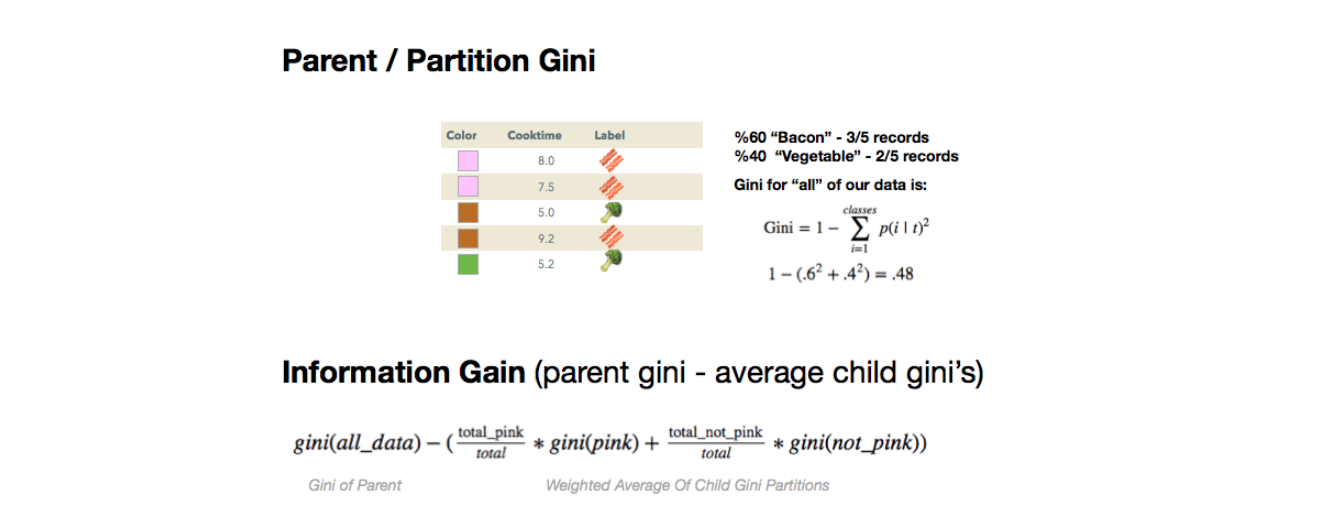

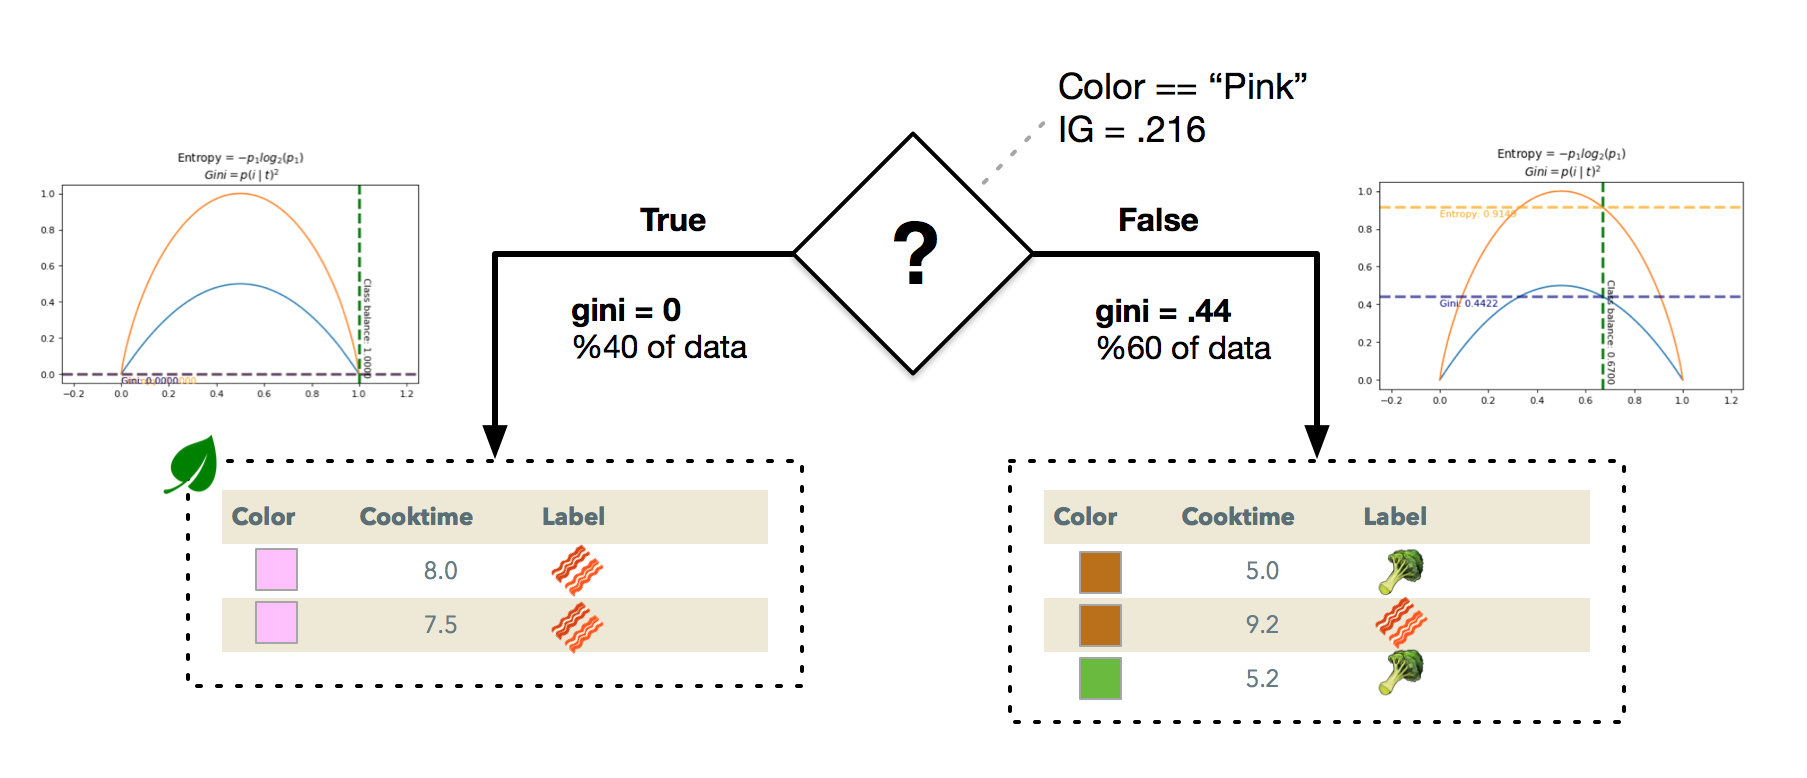

- **Parent node** (all data in this case of the root node)
 - **5** total observations
 - **3/5** obsevations belong to class "Bacon"
 - **2/5** observations belong to class "Vegetable"
 - **parent gini** is:  $1 - ((3/5)^2\ +\ (2/5)^2) = .48$
 
 
 
- **Child nodes** created as a result of color == "pink"<br><br>

    - $Gini(\text{Data where color}\ ==\ "pink")$
      - **2** total records in partition
      - **2/2** of obsevations belong to "Bacon" category
      - Gini with a class balance of **2/2 is 0** _(That's pure!)_<br><br>
      
    - $Gini(\text{Data where color}\ !=\ "pink)$
      - **3** total records in partition
      - **2/3** of observations, $P(y = "Vegetable")$
      - **1/3** of observations, $P(y = "Bacon")$
      - Gini is: $1 - ((2/3)^2\ +\ (1/3)^2) = .44$

> _Remember: A **gini** of .5 is maximum score for that metric.  For **entropy**, the maximum is 1._

**Information gain** for condition when parent to child nodes when condition is "color = pink", is:

## $.48 - (\frac{2}{2} * 0 + \frac{3}{5} * .44) = .216$

### Conclusion

- We use decision trees when:
  - Our data doesn't follow any distribution assumptions.
  - A parametric model doesn't "fit" their simplying assumptions.
- We can use **gini** or **entropy** to measure "purity".
  - They achieve nearly identical results.
  - **gini** is more efficient because log doesn't need to be calculated.
- Purity of parent and child nodes in a decision tree can be assessed for **Information gain** to determine the best splitting criteria.